### Exploratory Data Analysis

Objective: The goal of our study is to identify which vital-sign features e.g ECG or heart rate can be used to predict apnea events in stroke patients using a machine learning model

In [1]:

import pandas as pd
import numpy as np
import pickle
from matplotlib import pyplot as plt
from datetime import datetime
import time


Given that the dataset contains recordings of vitals for 30 patients, to make the data easy to handle, we first created a list of dataframes where each dataframe contained per patient data

In [2]:
## a list to store the data for each patient 
dfs_list = []

We first start by loading the data...

In [3]:
f = open('./dataset_OSAS.pickle', 'rb')
data = pickle.load(f)
f.close()


Here we parse the entire data, remove duplicates and initialize the list of dataframes

In [4]:
## dropping duplicates from the data 
for i in range(1,31,1):
    df = data[data['patient'] == str(i)]
    df.drop_duplicates(subset=['timestamp_datetime'], inplace=True)
    dfs_list.append(df)

C:\Users\vafab\AppData\Local\Temp\ipykernel_21824\2526491877.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop_duplicates(subset=['timestamp_datetime'], inplace=True)


As a first step towards EDA, we first wanted to see different statistics associated with each feature for our better understanding of the nature of the data we are handling

In [15]:
data.describe()

,HR(bpm),SpO2(%),PI(%),RR(rpm),PVCs(/min),anomaly
count,957813.000000,828777.000000,828102.000000,942901.000000,957813.000000,961357
unique,NaN,NaN,NaN,NaN,NaN,2
top,NaN,NaN,NaN,NaN,NaN,False
freq,NaN,NaN,NaN,NaN,NaN,815917
mean,64.683292,95.479754,3.981212,15.894219,0.629161,NaN
std,14.302865,2.875233,2.416226,3.689678,2.308404,NaN
min,30.000000,60.000000,0.060000,5.000000,0.000000,NaN
25%,54.000000,94.000000,2.200000,13.000000,0.000000,NaN
50%,62.000000,96.000000,3.510000,15.000000,0.000000,NaN
75%,74.000000,97.000000,5.270000,18.000000,0.000000,NaN


We first plotted the number of events per patient i.e apnea and hypopnea to see how the distribution events across subjects

Text(0.5, 1.0, 'Number of Hypopnea Event for each Patient')

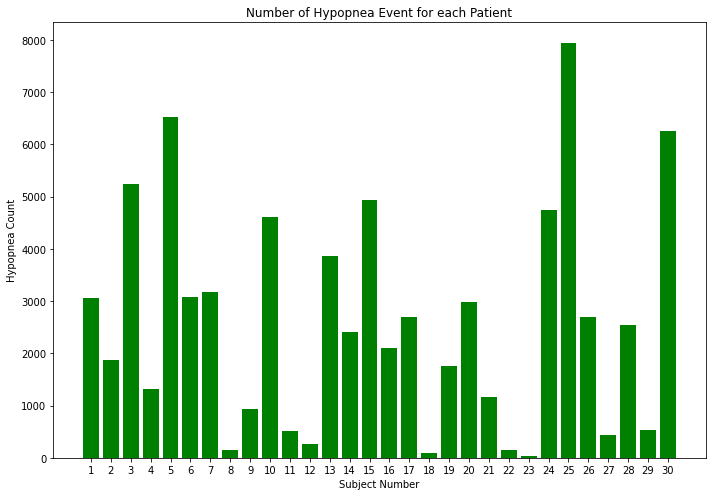

In [31]:
### plotting counts of hypoapnea events for each patient 
hypopnea_list = []

for i in range(1,31,1):
    temp = data[data['patient'] == str(i)]
    temp = temp['event'].value_counts()
    temp = pd.DataFrame(temp)
    temp.reset_index(inplace = True)
    hypoapnea = temp.loc[temp['index'] == 'HYPOPNEA']['event'].iloc[0]
    hypopnea_list.append(hypoapnea)

plt.rcParams["figure.figsize"] = [10, 7]
plt.rcParams["figure.autolayout"] = True
x_vals = range(1,31,1)
plt.bar(x_vals, hypopnea_list, color = 'green')
plt.xticks(x_vals)
plt.xlabel("Subject Number")
plt.ylabel("Hypopnea Count")
plt.title("Number of Hypopnea Event for each Patient")

30


Text(0.5, 1.0, 'Number of Apnea Events for each Patient')

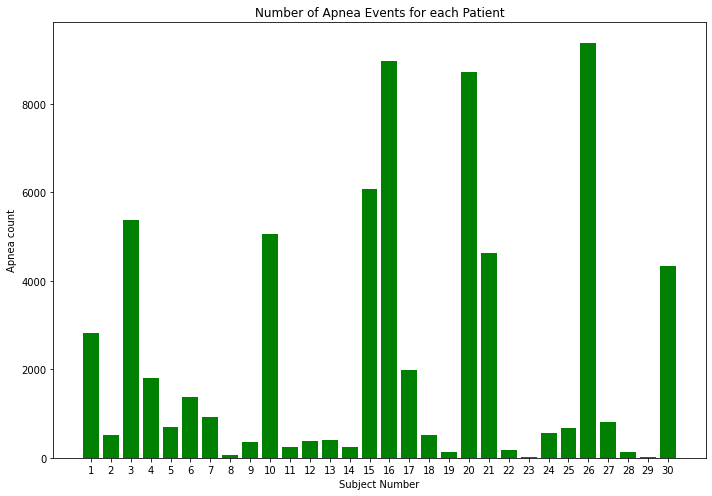

In [32]:
apnea_list = []
print(len(dfs_list))

for i in range(0,30,1):
    temp = dfs_list[i].query("event != 'HYPOPNEA'").query("event != 'NONE'")
    apnea_list.append(len(temp))

plt.rcParams["figure.figsize"] = [10, 7]
plt.rcParams["figure.autolayout"] = True
x_vals = range(1,31,1)
plt.bar(x_vals, apnea_list, color = 'green')
plt.xticks(x_vals)
plt.xlabel("Subject Number")
plt.ylabel("Apnea count")
plt.title("Number of Apnea Events for each Patient")

Since we had the recording of a number of vitals in the dataset, it seemed like a good idea to find the relationship between different features. First, we found out the covariance in the dataset between all the numeric values.However, ad can be seen from the table, we were not able to find a statiscially significant result 

In [33]:
data.cov()

,HR(bpm),SpO2(%),PI(%),RR(rpm),PVCs(/min),anomaly
HR(bpm),204.571948,-4.193349,-9.061032,17.302908,7.391100,-0.008272
SpO2(%),-4.193349,8.266963,-1.597757,-1.355408,-0.591348,-0.074999
PI(%),-9.061032,-1.597757,5.838146,-1.030264,-0.340358,-0.048826
RR(rpm),17.302908,-1.355408,-1.030264,13.613726,1.470620,0.009669
PVCs(/min),7.391100,-0.591348,-0.340358,1.470620,5.328729,0.063249
anomaly,-0.008272,-0.074999,-0.048826,0.009669,0.063249,0.128399


Next, we created a correlation matrix to see if any correlations exist

In [99]:
## Correlation relationship also explored 
data.corr(method = 'pearson')

,HR(bpm),SpO2(%),PI(%),RR(rpm),PVCs(/min),anomaly
HR(bpm),1.000000,-0.104769,-0.269432,0.326877,0.223859,-0.001612
SpO2(%),-0.104769,1.000000,-0.230038,-0.129233,-0.095152,-0.071342
PI(%),-0.269432,-0.230038,1.000000,-0.116478,-0.065236,-0.055264
RR(rpm),0.326877,-0.129233,-0.116478,1.000000,0.176559,0.007326
PVCs(/min),0.223859,-0.095152,-0.065236,0.176559,1.000000,0.076380
anomaly,-0.001612,-0.071342,-0.055264,0.007326,0.076380,1.000000


Text(0.5, 1.0, 'Duration of recording for each patient in hours')

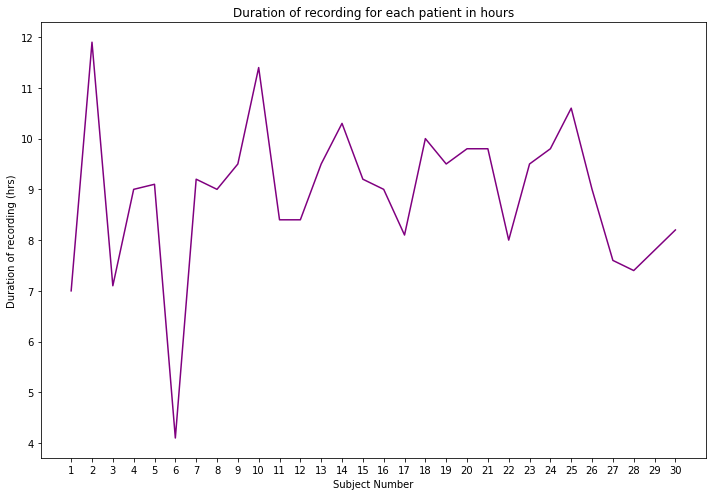

In [11]:
## finding the duration of time for each patient
count = 1
list_duration = []
for df in dfs_list:
    temp = list(df['timestamp_datetime'])
    t1 = temp[0]
    t2 = temp[-1]
    duration = round((t2 - t1).total_seconds() / 3600,1)
    list_duration.append(duration)

plt.rcParams["figure.figsize"] = [10, 7]
plt.rcParams["figure.autolayout"] = True
x_vals = range(1,31,1)
plt.plot(x_vals, list_duration, color = 'purple')
plt.xticks(x_vals)
plt.xlabel("Subject Number")
plt.ylabel("Duration of recording (hrs)")
plt.title("Duration of recording for each patient in hours")

As can be seen, there is a significant difference in the duration of recording between the subjects, especially for subject 6 and 12. Later as we analyse the data, we will explore further how that factors into the detection of apnea events